<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [141]:
import numpy as np
from numpy.linalg import eig
import cmath as cm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import *
from matplotlib.patches import Rectangle
import sympy as sp
import math as math
import matplotlib.pylab as pylab
import matplotlib
import matplotlib.colors as colors
from matplotlib import cm

params = {'legend.fontsize': 15,
          'axes.labelsize': 20,
          'axes.labelpad' : 15,
          'axes.titlesize':20,
          'xtick.labelsize':20,
          'ytick.labelsize':20,
           'text.usetex': False,
           'font.family': 'stixgeneral',
           'mathtext.fontset': 'stix',
          
          }

pylab.rcParams.update(params)

def q(states,diff): 
    
    count=0
    dx    = diff(states)
    
    for i in range(len(states)):
        count+=dx[i]**2
    
    q_=count
    return q_


def eco_model(states):
    
    a1=-0.5
    a2=0.5
    b1=-0.5
    b2=1
   
    x1   = states[0]
    x2   = states[1]
    
    dx = np.zeros(states.shape)
    
    dx[0] = a1*(x1**3) + a2*x1 + phi
    dx[1] = b1*(x2**3) + b2*x2 + 0.48*x1
    
    return dx


def jj_model(states):
    
    gamma=0.5
    K=0.05
    E=0.9
    
    x1   = states[0]
    x2   = states[1]
    
    dx = np.zeros(states.shape)
    
    dx[0] = E + 0.5*(np.sin((x1+x2)) + np.sin(x2-x1))
    dx[1] = (1/(1+2*gamma))*(-2*K*x2 + 0.5*(np.sin((x1+x2))+np.sin(x1-x2)))
    
    return dx
def bc_model(states):
    
    S = 0
    xtot = 1
    k1 = 1
    k2 = 2
    k3 = 1
    K = 0.505
    n = 4   
    
    dx = np.zeros(states.shape) 
    
    x1   = states[0]
    x2   = states[1] 
    
    xp=x1
    yp=x2
    
    dx[0] = (k1*S + k2*xp**n/(K**n+xp**n))*(xtot-xp)-k3*xp
    dx[1] = (k1*xp + k2*yp**n/(K**n+yp**n))*(xtot-yp)-k3*yp
    
    return dx

def dnf_model(states):
    
    dx = np.zeros(states.shape) 
    
    x1   = states[0]
    x2   = states[1]
    
    a=x1
    b=x2
    
    s=1.835
    ga0=4.0
    gas=18.0
    gab=0.7
    gabs=4.0
    gb0=7.5
    gbb=39.0
    gba=1.0
    gbab=7.5
    sa0=140
    ba0=315
    ab0=130
    bb0=75
    nsa=2.0
    nba=4.0
    nab=5.0
    nbb=6.0
    ka=0.05
    kb=0.075
    pr=1
    k0=0.01
    
    hsm = 1/(1+(s/k0/sa0)**nsa)
    hsp = 1-hsm

    h1bm = 1/(1+(b/ba0)**nba)
    h1bp = 1-h1bm

    ham = 1/(1+(a/ab0)**nab)
    hap = 1-ham

    h2bm = pr*1/(1+(b/bb0)**nbb)
    h2bp = 1-h2bm

    gasb = ga0*hsm*h1bm  +  gas*hsp*h1bm  +  gab*hsm*h1bp  +  gabs*hsp*h1bp

    gbba = gb0*h2bm*ham*pr  +  gbb*h2bp*ham  +  gba*h2bm*hap*pr  +gbab*h2bp*hap*pr
    
    
    dx[1] = gbba-kb*b
    dx[0] = gasb-ka*a 
    
    return dx


In [142]:
def jac_jj(x1,x2):
    
    jacobian=np.array([[0.5*(np.cos(x1+x2)-np.cos(x2-x1)),0.5*(np.cos(x1+x2)+ np.cos(x2-x1))],
                 [1/(1+2*gamma)*0.5*(np.cos(x1+x2)+np.cos(x2-x1)),1/(1+2*gamma)*(-2*K+ 0.5*(np.cos(x1+x2)-np.cos(x2-x1)))]])

    return jacobian 

def jac_eco(x1,x2):
    
    a1=-0.5
    a2=0.5
    b1=-0.5
    b2=1
    jacobian=np.array([[3*a1*(x1**2) + a2,0],
                       [0.48,3*b1*(x2**2) +b2]])
    return jacobian


def jac_bc(x1,x2):
    
    xp   = x1
    yp   = x2
        
    jacobian=np.array([[-8*xp**7*(1 - xp)/(xp**4 + 0.065037750625)**2 - 2*xp**4/(xp**4 + 0.065037750625) + 8*xp**3*(1 - xp)/(xp**4 + 0.065037750625) - 1, 0], [1 - yp, -xp - 2*yp**4/(yp**4 + 0.065037750625) + (1 - yp)*(-8*yp**7/(yp**4 + 0.065037750625)**2 + 8*yp**3/(yp**4 + 0.065037750625)) - 1]])

    return jacobian 

def jac_dnf(x1, x2):
    
#     x1   = states[0]
#     x2   = states[1]
    
    a=x1
    b=x2
    
    s=1.835
    ga0=4.0
    gas=18.0
    gab=0.7
    gabs=4.0
    gb0=7.5
    gbb=39.0
    gba=1.0
    gbab=7.5
    sa0=140
    ba0=315
    ab0=130
    bb0=75
    nsa=2.0
    nba=4.0
    nab=5.0
    nbb=6.0
    ka=0.05
    kb=0.075
    pr=1
    k0=0.01
    
    hsm = 1/(1+(s/k0/sa0)**nsa)
    hsp = 1-hsm

    h1bm = 1/(1+(b/ba0)**nba)
    h1bp = 1-h1bm

    ham = 1/(1+(a/ab0)**nab)
    hap = 1-ham

    h2bm = pr*1/(1+(b/bb0)**nbb)
    h2bp = 1-h2bm

    gasb = ga0*hsm*h1bm+gas*hsp*h1bm+gab*hsm*h1bp+gabs*hsp*h1bp

    gbba = gb0*h2bm*ham*pr+gbb*h2bp*ham+gba*h2bm*hap*pr+gbab*h2bp*hap*pr
    
    
#     jacobian=np.array([[ga0 * hsm * h1bm * (-nab * a ** (nab - 1) / ab0 ** nab) ,ga0 * hsm * (h1bp - h1bm) * (-nba * b ** (nba - 1) / ba0 ** nba)],
#                  [ gb0 * h2bm * pr * (-nab * a ** (nab - 1) / ab0 ** nab)     ,gb0 * pr * (h2bm * (hap - ham) * (-nbb * b ** (nbb - 1) / bb0 ** nbb) + h2bp * ham * (-nbb * b ** (nbb - 1) / bb0 ** nbb))]])
#     jacobian=np.array([[1.34664537171452e-10*a**4.0*(7.5 - 7.5/(5.61865569272977e-12*b**6.0 + 1))/(2.69329074342904e-11*a**5.0 + 1)**2 - 1.34664537171452e-10*a**4.0*(39.0 - 39.0/(5.61865569272977e-12*b**6.0 + 1))/(2.69329074342904e-11*a**5.0 + 1)**2 - 8.75319491614439e-10*a**4.0/((2.69329074342904e-11*a**5.0 + 1)**2*(5.61865569272977e-12*b**6.0 + 1)), 2.19127572016461e-10*b**5.0*(1 - 1/(2.69329074342904e-11*a**5.0 + 1))/(5.61865569272977e-12*b**6.0 + 1)**2 + 1.06192592592593e-9*b**5.0/((2.69329074342904e-11*a**5.0 + 1)*(5.61865569272977e-12*b**6.0 + 1)**2) - 0.075], [-0.0500000000000000, -4.08842144393401e-9*b**3.0/(1.0156820676443e-10*b**4.0 + 1)**2]])
    jacobian=np.array([[-0.0500000000000000, -4.08842144393401e-9*b**3.0/(1.0156820676443e-10*b**4.0 + 1)**2], [1.34664537171452e-10*a**4.0*(7.5 - 7.5/(5.61865569272977e-12*b**6.0 + 1))/(2.69329074342904e-11*a**5.0 + 1)**2 - 1.34664537171452e-10*a**4.0*(39.0 - 39.0/(5.61865569272977e-12*b**6.0 + 1))/(2.69329074342904e-11*a**5.0 + 1)**2 - 8.75319491614439e-10*a**4.0/((2.69329074342904e-11*a**5.0 + 1)**2*(5.61865569272977e-12*b**6.0 + 1)), 2.19127572016461e-10*b**5.0*(1 - 1/(2.69329074342904e-11*a**5.0 + 1))/(5.61865569272977e-12*b**6.0 + 1)**2 + 1.06192592592593e-9*b**5.0/((2.69329074342904e-11*a**5.0 + 1)*(5.61865569272977e-12*b**6.0 + 1)**2) - 0.075]])
    
    
    
    return jacobian    

In [143]:
K=0.9
phi=0.2
gamma=0.54



q_thresh=0.1
xmin=-5
xmax=4.5
ymin=-5.6
ymax=3

state_tf      = []
h             = 0.01
ran           = 10000
diff          = jj_model
states        = np.array([-5,-5])


for i in range(ran):

        k1 = h*diff(states)
        k2 = h*diff(states+k1/2)
        k3 = h*diff(states+k2/2)
        k4 = h*diff(states+k3)
        states = states + (k1 + 2*k2 + 2*k3 + k4)/6  
        if states[0] <2.8 and states[1] <2.8:
            state_tf.append(states)

npxl=101
x1=np.linspace(xmin,xmax,npxl)
x2=np.linspace(ymin,ymax,npxl)
grid_ss = np.meshgrid(x1, x2)
Xg,Yg=grid_ss


q_plot=np.zeros((npxl,npxl))
eig_plot=np.zeros((npxl,npxl))
U=np.zeros((len(x1),len(x2)));V=np.zeros((len(x1),len(x2)))

            
for j in range(len(x2)):
    for i in range(len(x1)):   
        x=np.array([x1[i],x2[j]])
        q_plot[j,i]=q(x,diff)
        if q_plot[j,i]<q_thresh:             
            jacobian = jac_jj(x1[i],x2[j])            
            eigen_values =max(np.real(eig(jacobian)[0]))
            eig_plot[j,i]=eigen_values
        else:
            eig_plot[j,i]=np.nan
        dx=diff(x)
        U[j,i],V[j,i]=dx[0],dx[1]   

state_tf1=np.array(state_tf)
q_plot1=q_plot
eig_plot1=eig_plot
U1=U
V1=V


#_____________________________________________________________

q_thresh=0.01
xmin=-2
xmax=2
ymin=-2
ymax=2

state_tf      = []
h             = 0.01
ran           = 5000
diff          = eco_model
states        = np.array([-2,-2])


for i in range(ran):

        k1 = h*diff(states)
        k2 = h*diff(states+k1/2)
        k3 = h*diff(states+k2/2)
        k4 = h*diff(states+k3)
        states = states + (k1 + 2*k2 + 2*k3 + k4)/6  
        state_tf.append(states)

npxl=101
x1=np.linspace(xmin,xmax,npxl)
x2=np.linspace(ymin,ymax,npxl)
grid_ss = np.meshgrid(x1, x2)
Xg,Yg=grid_ss


q_plot=np.zeros((npxl,npxl))
eig_plot=np.zeros((npxl,npxl))
U=np.zeros((len(x1),len(x2)));V=np.zeros((len(x1),len(x2)))

            
for j in range(len(x2)):
    for i in range(len(x1)):   
        x=np.array([x1[i],x2[j]])
        q_plot[j,i]=q(x,diff)
        if q_plot[j,i]<q_thresh:             
            jacobian = jac_eco(x1[i],x2[j])            
            eigen_values =max(np.real(eig(jacobian)[0]))
            eig_plot[j,i]=eigen_values
        else:
            eig_plot[j,i]=np.nan
        dx=diff(x)
        U[j,i],V[j,i]=dx[0],dx[1]   

state_tf2=np.array(state_tf)
q_plot2=q_plot
eig_plot2=eig_plot
U2=U
V2=V

#______________________________________________________

q_thresh=0.01
xmin=-0.5
xmax=1
ymin=-0.5
ymax=1

state_tf      = []
h             = 0.01
ran           = 10000
diff          = bc_model
states        = np.array([1,0])


for i in range(ran):

        k1 = h*diff(states)
        k2 = h*diff(states+k1/2)
        k3 = h*diff(states+k2/2)
        k4 = h*diff(states+k3)
        states = states + (k1 + 2*k2 + 2*k3 + k4)/6  
        state_tf.append(states)

npxl=101
x1=np.linspace(xmin,xmax,npxl)
x2=np.linspace(ymin,ymax,npxl)
grid_ss = np.meshgrid(x1, x2)
Xg,Yg=grid_ss


q_plot=np.zeros((npxl,npxl))
eig_plot=np.zeros((npxl,npxl))
U=np.zeros((len(x1),len(x2)));V=np.zeros((len(x1),len(x2)))

            
for j in range(len(x2)):
    for i in range(len(x1)):   
        x=np.array([x1[i],x2[j]])
        q_plot[j,i]=q(x,diff)
        if q_plot[j,i]<q_thresh:             
            jacobian = jac_bc(x1[i],x2[j])            
            eigen_values =max(np.real(eig(jacobian)[0]))
            eig_plot[j,i]=eigen_values
        else:
            eig_plot[j,i]=np.nan
        dx=diff(x)
        U[j,i],V[j,i]=dx[0],dx[1]   

state_tf3=np.array(state_tf)
q_plot3=q_plot
eig_plot3=eig_plot
U3=U
V3=V
#_________________________________________________________________________________________

C:\Users\ramesan\AppData\Local\Temp\ipykernel_22392\760180984.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('cool')
C:\Users\ramesan\AppData\Local\Temp\ipykernel_22392\760180984.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm1 = plt.cm.get_cmap('RdYlBu')
C:\Users\ramesan\AppData\Local\Temp\ipykernel_22392\760180984.py:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('cool')
C:\Users\ramesan\AppData\Local\Temp\ipykernel_22392\76

Text(0.5, 0, 'time (a.u.)')

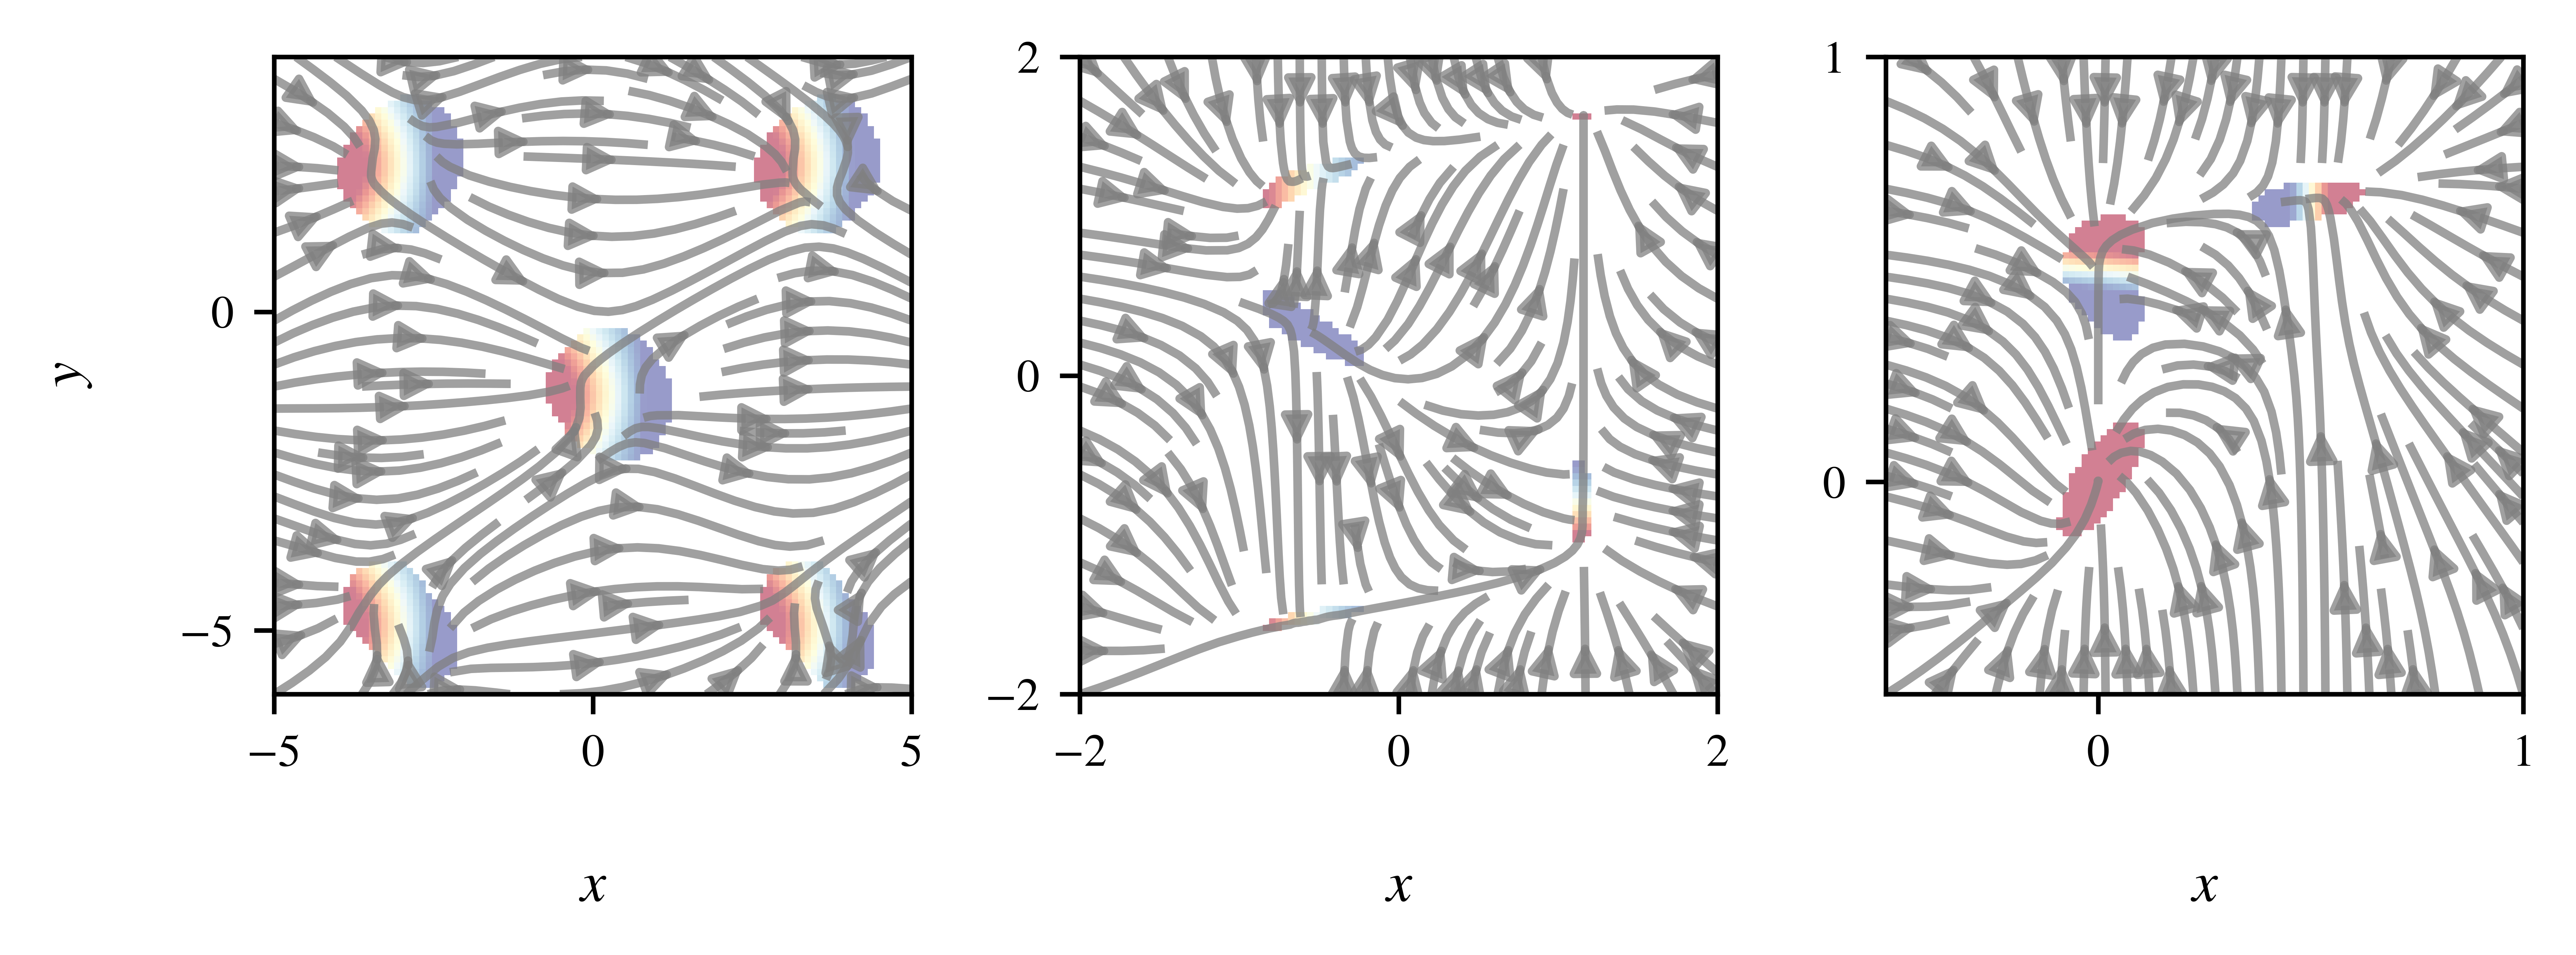

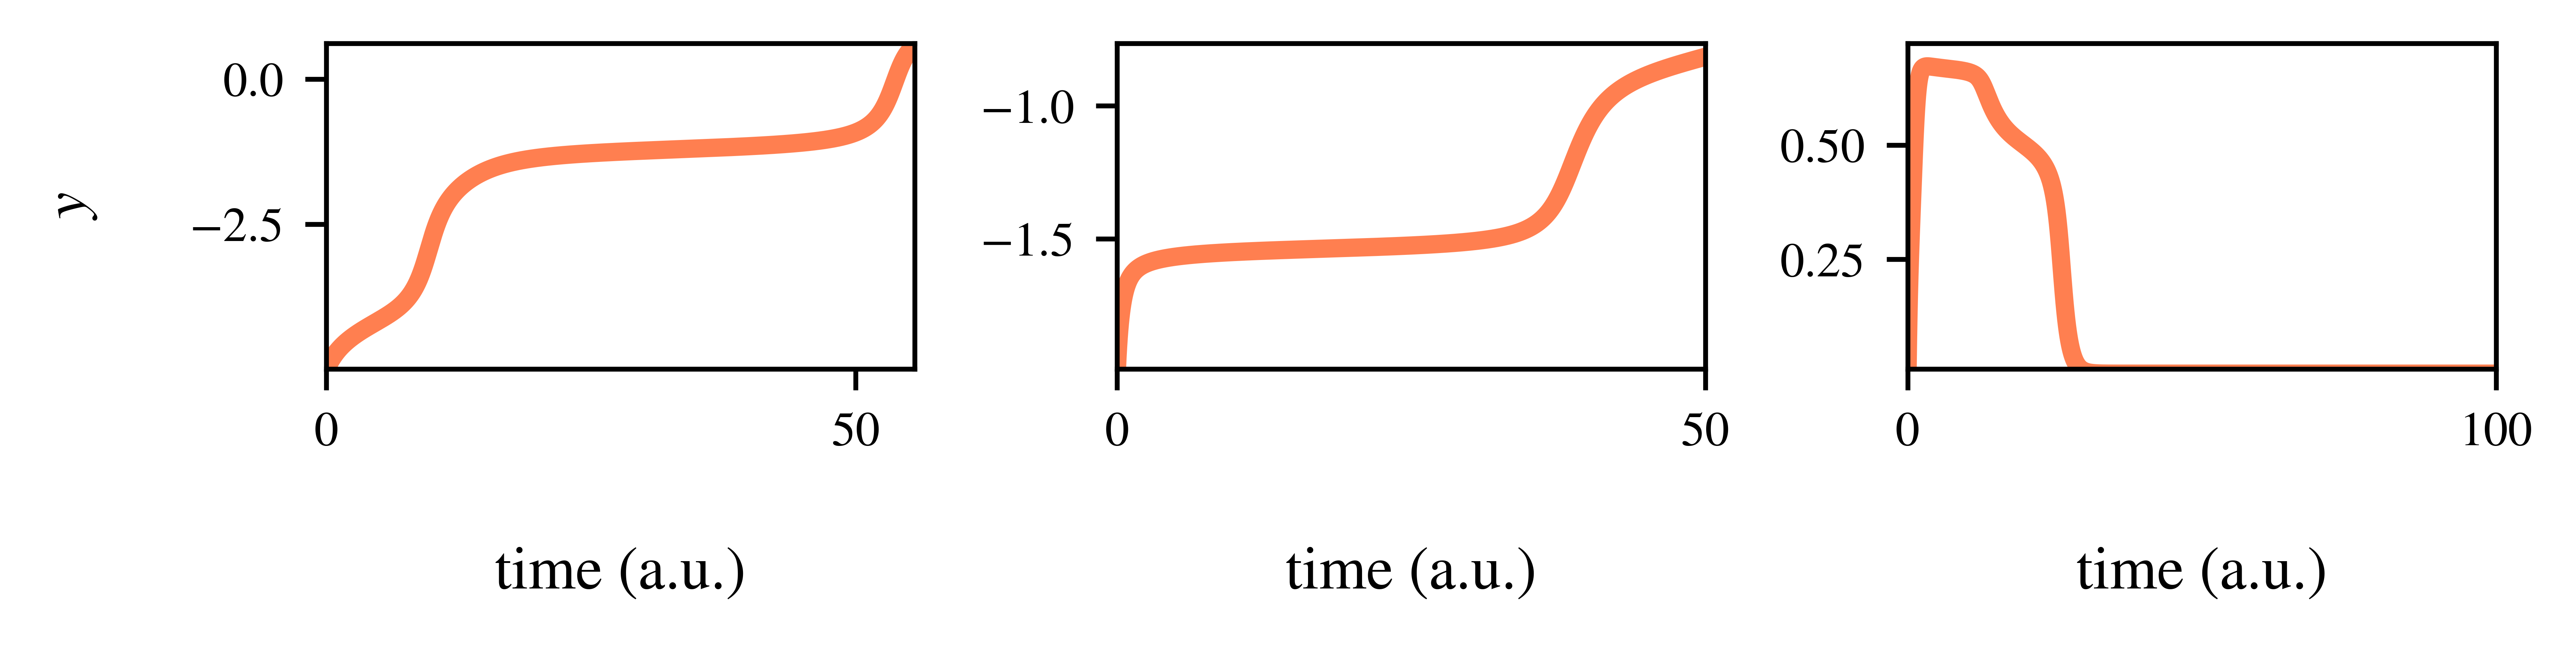

In [144]:
#Figure 2(e) Left
%matplotlib inline

inCm=1/2.54
plt.figure(figsize=(16*inCm,8*inCm),dpi=1200)
xmin=-5
xmax=5
ymin=-6
ymax=4

state_tf=state_tf1
q_plot=q_plot1
eig_plot=eig_plot1
U=U1
V=V1
q_list=q_list1
x1=np.linspace(xmin,xmax,npxl)
x2=np.linspace(ymin,ymax,npxl)

vel_components=np.gradient(state_tf.T,np.arange(0,len(state_tf)*0.01,0.01),axis=1)
vel_full=0
for i in range(2):
    vel_full=vel_full+vel_components[i]**2
vel_full=np.sqrt(vel_full)

relV3=q_list
q1 = np.percentile(relV3, 5)
q2 = np.percentile(relV3, 95)

cmBounds3 = [q1, q2]

cmap=cm.get_cmap('cool')
norm3 = plt.Normalize(cmBounds3[0],cmBounds3[1])
sm3 = plt.cm.ScalarMappable(norm=norm3, cmap=cmap)

cm1 = plt.cm.get_cmap('RdYlBu')

plt.tight_layout()
plt.subplots_adjust(top=0.88,bottom=0.11,left=0.125,right=0.9,hspace=0.2,wspace=0.5)
plt.subplot(1,3,1)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xlabel('$x$',fontsize=10)
plt.ylabel('$x$',fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('$y$')

im=plt.imshow(eig_plot,cmap=cm1,origin='lower',extent=[xmin,xmax,ymin,ymax],vmin=-0.5,vmax=0.5,interpolation=None,alpha=0.5)
plt.streamplot(x1,x2,U,V,density=1,color=[0.5,0.5,0.5,0.75])

#---------------------------------------------------------------------------------------------------------
#Figure 2(e) Middle

xmin=-2
xmax=2
ymin=-2
ymax=2

state_tf=state_tf2
q_plot=q_plot2
eig_plot=eig_plot2
U=U2
V=V2
q_list=q_list2
x1=np.linspace(xmin,xmax,npxl)
x2=np.linspace(ymin,ymax,npxl)

vel_components=np.gradient(state_tf.T,np.arange(0,len(state_tf)*0.01,0.01),axis=1)
vel_full=0
for i in range(2):
    vel_full=vel_full+vel_components[i]**2
vel_full=np.sqrt(vel_full)

relV3=q_list
q1 = np.percentile(relV3, 5)
q2 = np.percentile(relV3, 95)

cmBounds3 = [q1, q2]

cmap=cm.get_cmap('cool')
norm3 = plt.Normalize(cmBounds3[0],cmBounds3[1])
sm3 = plt.cm.ScalarMappable(norm=norm3, cmap=cmap)

cm1 = plt.cm.get_cmap('RdYlBu')

plt.tight_layout()
plt.subplots_adjust(top=0.88,bottom=0.11,left=0.125,right=0.9,hspace=0.2,wspace=0.5)
plt.subplot(1,3,2)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xlabel('$x$',fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
im=plt.imshow(eig_plot,cmap=cm1,origin='lower',extent=[xmin,xmax,ymin,ymax],vmin=-0.5,vmax=0.5,interpolation=None,alpha=0.5)
plt.xlabel('$x$',fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.streamplot(x1,x2,U,V,density=1,color=[0.5,0.5,0.5,0.75])

#--------------------------------------------------------------------------------------------------------
#Figure 2(e) Right
xmin=-0.5
xmax=1
ymin=-0.5
ymax=1
U=U3
V=V3
q_list=q_list3
x1=np.linspace(xmin,xmax,npxl)
x2=np.linspace(ymin,ymax,npxl)

state_tf=state_tf3
q_plot=q_plot3
eig_plot=eig_plot3
vel_components=np.gradient(state_tf.T,np.arange(0,len(state_tf)*0.01,0.01),axis=1)
vel_full=0
for i in range(2):
    vel_full=vel_full+vel_components[i]**2
vel_full=np.sqrt(vel_full)

relV3=q_list
q1 = np.percentile(relV3, 5)
q2 = np.percentile(relV3, 95)

cmBounds3 = [q1, q2]

cmap=cm.get_cmap('cool')
norm3 = plt.Normalize(cmBounds3[0],cmBounds3[1])
sm3 = plt.cm.ScalarMappable(norm=norm3, cmap=cmap)

cm1 = plt.cm.get_cmap('RdYlBu')
plt.tight_layout()
plt.subplot(1,3,3)
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xlabel('$x$',fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.streamplot(x1,x2,U,V,density=1,color=[0.5,0.5,0.5,0.75])
im=plt.imshow(eig_plot,cmap=cm1,origin='lower',extent=[xmin,xmax,ymin,ymax],vmin=-0.5,vmax=0.5,interpolation=None,alpha=0.5)

%matplotlib inline
plt.figure(figsize=(15*inCm,4*inCm),dpi=1200)
plt.tight_layout()
# plt.subplots_adjust(top=0.88,bottom=0.11,left=0.125,right=0.9,hspace=0.2,wspace=0.5)
plt.subplot(1,3,1)
state_tf=state_tf1
plt.ylabel('$y$',fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlim(0,len(state_tf)*0.01)
plt.ylim(state_tf[0,1],max(state_tf[:,1])+0.05)
plt.plot(np.arange(0,len(state_tf)*0.01,0.01),state_tf[:len(state_tf),1],color='coral',ls='-',lw=3.0)
plt.xlabel('time (a.u.)',fontsize=10)

plt.tight_layout()
plt.subplot(1,3,2) 
state_tf=state_tf2
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlim(0,len(state_tf)*0.01)
plt.ylim(state_tf[0,1],max(state_tf[:,1])+0.05)
plt.plot(np.arange(0,len(state_tf)*0.01,0.01),state_tf[:len(state_tf),1],color='coral',ls='-',lw=3.0)
plt.xlabel('time (a.u.)',fontsize=10)

plt.tight_layout()
plt.subplot(1,3,3)
state_tf=state_tf3

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlim(0,len(state_tf)*0.01)
plt.ylim(state_tf[0,1],max(state_tf[:,1])+0.05)
plt.plot(np.arange(0,len(state_tf)*0.01,0.01),state_tf[:len(state_tf),1],color='coral',ls='-',lw=3.0)
plt.xlabel('time (a.u.)',fontsize=10)